In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [79]:
total_boat_mass = 40.0 #kg
g = 9.81
p = 1000.0

length = 1.0 #m
width = 1.0 #m
draft = (total_boat_mass) / (p * length * width)
print draft
KG = draft


theta_initial_max = np.arcsin(2*draft / width)
theta_initial = np.linspace(0, theta_initial_max, 1000)

theta_lift = np.linspace(theta_initial_max, np.radians(70.0), 10000)

0.04


In [101]:
## when corner is submerged
submerged_area = 0.5 * (2.0 * (draft / np.cos(theta_initial) - width / 2.0 * np.tan(theta_initial)) + width*np.tan(theta_initial)) * width
h = draft / np.cos(theta_initial) - width / 2.0 * np.tan(theta_initial)
l = width * np.tan(theta_initial)
print ((h + l/3.0)*np.sin(theta) + width*np.cos(theta)/6.0)[-1]
M_initial = -KG*np.sin(theta)*total_boat_mass*g + length*p*g*(width*h**2*np.sin(theta_initial)/2.0 + width*l*((h + l/3.0)*np.sin(theta_initial) + width*np.cos(theta_initial)/6.0)/2.0)
# M_initial = length * p * g * (-KG*submerged_area*np.sin(theta_initial) + width*h**2*np.sin(theta_initial)/2.0 + width*l*((h + l/3.0)*np.sin(theta_initial) + width*np.cos(theta_initial)/6.0)/2.0)

## when corner lifts
f = draft / np.sin(theta_lift) + width / 2.0
l2 = f * np.tan(theta_lift)

bma_lift = ((width/2.0 - f/3.0)**2 + (l2/3)**2)**0.5 * np.cos(theta_lift)
gma = KG*np.sin(theta_lift)
submerged_area_lift = 0.5 * (f * l2)
print bma_lift[0]

M_lift = -gma*total_boat_mass*g + length*p*g*submerged_area_lift*bma_lift

0.163453487884
0.168259059522


<IPython.core.display.Javascript object>


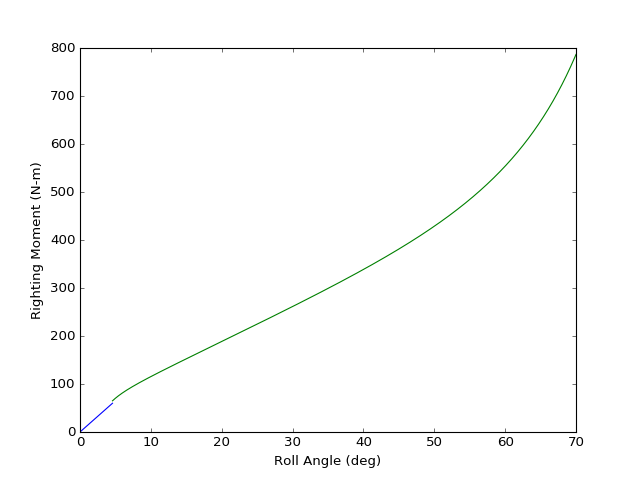

In [97]:
plt.plot(np.degrees(theta_initial), M_initial)
plt.plot(np.degrees(theta_lift), M_lift)
plt.xlabel('Roll Angle (deg)')
plt.ylabel('Righting Moment (N-m)')
plt.show()

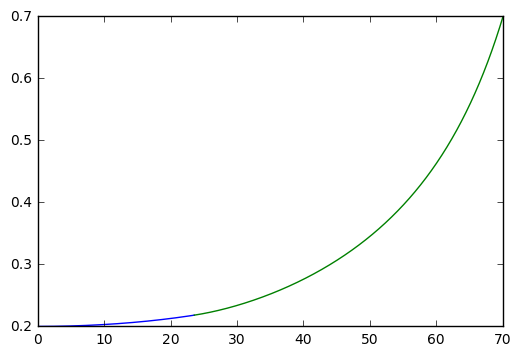

In [60]:
plt.plot(np.degrees(theta), submerged_area)
plt.plot(np.degrees(theta_lift), submerged_area_lift)
plt.show()